# Image processing Lab: correlation and pattern matching
## DS&AI - 2023-24
### Translated from Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [4]:
from skimage import io
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import math

In [5]:
%matplotlib inline

## Cross Correlation

In [6]:
#Here are the thumbnails used in the slides
imageTest = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifTest = np.array([[4,5,6],[4,5,8],[40,50,80]])

[[  4   5   6   7   8]
 [  4   5   8   9  10]
 [ 40  50  80  90 100]
 [ 43  48  88  92   5]]
[[ 4  5  6]
 [ 4  5  8]
 [40 50 80]]


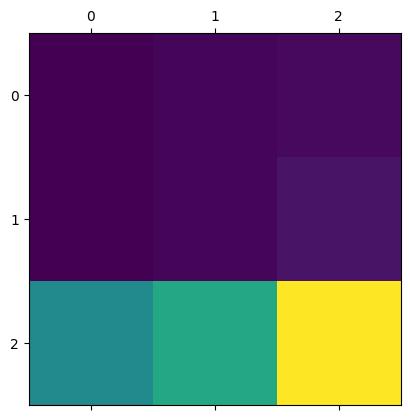

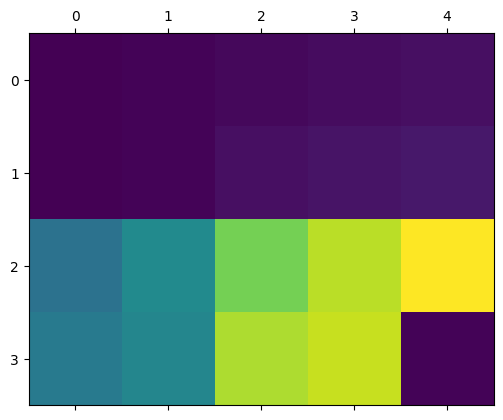

In [7]:
print(imageTest)
print(motifTest)
plt.matshow(motifTest)
plt.matshow(imageTest)

**Question 1:** Write the code of the function *correlationWithoutNorm* which takes as input 2 2d-arrays of values: an image (in grayscale) and a pattern, then output the image of correlations without normalisation.

In [12]:
def crossCorrelationWithoutNorm(im, mo):
    res = np.zeros_like(im)
    him = im.shape[0]
    wim = im.shape[1]
    hmo = mo.shape[0]
    wmo = mo.shape[1]
    for i in range(1, him-1):
        for j in range(1, wim-1):
            res[i][j] = np.sum(im[i-1: i-1 + hmo, j-1: j-1+wmo] * mo)

    return res


In [14]:
res = crossCorrelationWithoutNorm(imageTest, motifTest)
res

array([[    0,     0,     0,     0,     0],
       [    0, 10682, 13424, 15964,     0],
       [    0, 12299, 15114, 10227,     0],
       [    0,     0,     0,     0,     0]])

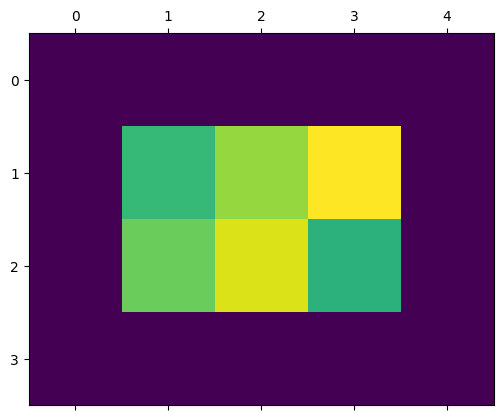

In [16]:
plt.matshow(res)

**Question 2:** Write the code of the function *correlation* which takes as input 2 2d-arrays of values: an image (in grayscale) and a pattern, then output the image of correlations with the normalisations seen in the slides. You can write a naïve implementation.

In [44]:
def crossCorrelation(im, mo):
    res = np.zeros_like(im, dtype=float)
    him = im.shape[0]
    wim = im.shape[1]
    hmo = mo.shape[0]
    wmo = mo.shape[1]
    hmo2, wmo2 = hmo//2, wmo//2
    for i in range(hmo2, him-hmo2):
        for j in range(wmo2, wim-wmo2):
            sub_matrix = np.array(im[i-hmo2: i-hmo2 + hmo, j-wmo2: j-wmo2 + wmo], dtype=float)
            res[i][j] = round(np.sum((sub_matrix - np.mean(sub_matrix)) * (mo-np.mean(mo))) / (np.std(sub_matrix)*np.std(mo)*hmo*wmo),2)

    return res


**Question 3:** Test the previous function. Display the results. If necessary, improve the implementation to speed up calculations. It will be possible and perhaps necessary to return to this question later (question 5).

In [ ]:
def crossCorrelation2(im, mo):
    # Have done it before
    return res


In [42]:
# To test
norm_res = crossCorrelation(imageTest, motifTest)
norm_res

(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)


array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.98,  0.96,  0.  ],
       [ 0.  ,  0.6 ,  0.55, -0.06,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

## logo in an image

**Question 4:** Select an image with several instances of a pattern and keep the image and a copy of the pattern. Modify the next cell accordingly. Either the images are grayscale, or they need to be converted.

In [25]:
img = io.imread('text.png')
logo = io.imread('letter-a.png')
#img = io.imread('plaqadmissions.jpg')
#logo = io.imread('plaqadmissions-logo.png')

In [33]:
# conversion in grayscale
img = rgb2gray(img[:,:,0:3])
logo = rgb2gray(logo[:,:,0:3])

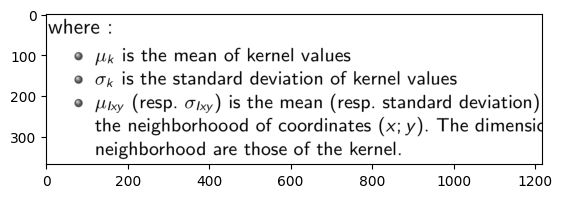

In [34]:
plt.imshow(img, cmap=plt.cm.gray)

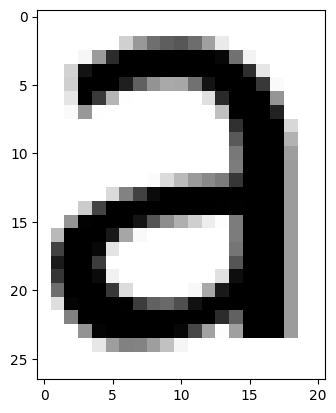

In [35]:
plt.imshow(logo, cmap=plt.cm.gray)

**Question 5:** Compute the correlation map and display it as a warm-color map. If the calculations take too long, return to question 3.

In [45]:
# for you
cor_map = crossCorrelation(img, logo)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11836\2442107391.py:11: RuntimeWarning: invalid value encountered in scalar divide
  res[i][j] = round(np.sum((sub_matrix - np.mean(sub_matrix)) * (mo-np.mean(mo))) / (np.std(sub_matrix)*np.std(mo)*hmo*wmo),2)


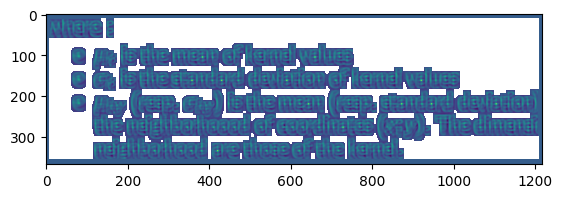

In [47]:
plt.imshow(cor_map)

**Question 6:** Which max? Where is it?

In [ ]:
# for you

**Question 7:** Where are the high correlation values? Determine a threshold: 0.5? 0.8? 0.9? Various visualization options are then available:
- display the thresholded correlation map transparently on the original image, or
- circle the relevant areas on the correlation map or
- on the original image.

In [ ]:
# for you